In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

p_data_raw = os.path.abspath('data') # raw data path

employee_retention = pd.read_csv(p_data_raw+'/employee_retention.csv',index_col=0)
employee_retention_data = pd.read_excel(p_data_raw+'/employee_retention_data.xlsx',
                                        sheet_name='employee_retention_data')

In [2]:
print('Table "employee_retention"\n')
employee_retention.info()

Table "employee_retention"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34702 entries, 0 to 34701
Data columns (total 7 columns):
employee_id    34702 non-null float64
company_id     34702 non-null int64
dept           34702 non-null object
seniority      34702 non-null int64
salary         34463 non-null float64
join_date      34702 non-null object
quit_date      23510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ MB


In [3]:
print('Table "employee_retention_data"\n')
employee_retention_data.info()

Table "employee_retention_data"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null int64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null int64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 1.3+ MB


In [4]:
# merge two tables -> retention
retention = employee_retention.append(employee_retention_data)
# clean employee_retention 'employee_id' column
retention['employee_id'] = retention['employee_id'].apply(lambda x:int(x))
# remove duplicate
retention.drop_duplicates(subset = ['employee_id','company_id'],keep='first',inplace=True)
print('Merged Table "retention"\n')
print(retention.info())

Merged Table "retention"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34702 entries, 0 to 34701
Data columns (total 7 columns):
employee_id    34702 non-null int64
company_id     34702 non-null int64
dept           34702 non-null object
seniority      34702 non-null int64
salary         34463 non-null float64
join_date      34702 non-null object
quit_date      23510 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ MB
None


In [5]:
# check missing value(s)
print(retention.isnull().sum())

employee_id        0
company_id         0
dept               0
seniority          0
salary           239
join_date          0
quit_date      11192
dtype: int64


In [6]:
# check column values
print('company_id:\n', retention.company_id.unique())
print('\n')
print('dept:\n', retention.dept.unique())
print('\n')
print('seniority:\n', retention.seniority.unique())

company_id:
 [ 8  3  2  1  5  7 10  6  4  9 12 11]


dept:
 ['temp_contractor' 'design' 'engineer' 'marketing' 'customer_service'
 'data_science' 'sales']


seniority:
 [ 0 21  9 20 18  7 16 28  3 13 17  4  8  1 29 19  6 22 15 14 27 10 23 12
 26 24 11  2 25  5 98 99]


In [7]:
# check seniority 98 & 99
print(retention[retention.seniority == 98])
print('\n')
print(retention[retention.seniority == 99])

       employee_id  company_id      dept  seniority    salary   join_date  \
23683        97289          10  engineer         98  266000.0  2011-12-13   

        quit_date  
23683  2015-01-09  


       employee_id  company_id       dept  seniority    salary   join_date  \
26543       604052           1  marketing         99  185000.0  2011-07-26   

        quit_date  
26543  2013-12-06  


In [8]:
# find mean salary by dept X seniority
salary_sum = retention.pivot_table(values='salary',index='seniority',columns='dept',aggfunc='mean')
salary_sum

dept,customer_service,data_science,design,engineer,marketing,sales,temp_contractor
seniority,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,7510.9801
1,26910.493827,67702.970297,43140.350877,67928.994083,45347.826087,44000.000000,NaN
2,27023.188406,65636.363636,44911.111111,68826.666667,44840.579710,44712.121212,NaN
3,26930.722892,68188.118812,46812.500000,67754.491018,45427.184466,44743.589744,NaN
4,27504.731861,66817.307692,44000.000000,68918.128655,45476.923077,44588.235294,NaN
5,68924.637681,177218.045113,118108.695652,177872.727273,118606.837607,118344.537815,NaN
6,70773.700306,174540.540541,120719.298246,172908.629442,117207.207207,117198.529412,NaN
7,70783.699060,172888.059701,120209.677419,176216.560510,115427.419355,118520.661157,NaN
8,70093.406593,174971.014493,113140.000000,172600.000000,120975.409836,116639.455782,NaN


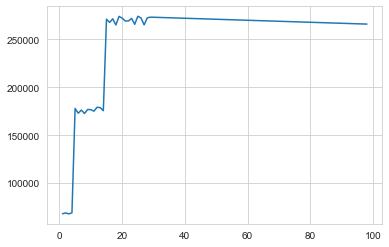

In [9]:
# engineer mean salary by seniority
plt.plot(salary_sum['engineer'])

185000.0


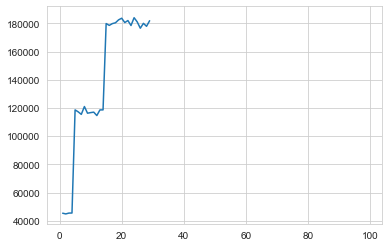

In [10]:
# marketing professional mean salary by seniority
plt.plot(salary_sum['marketing'])
print(salary_sum['marketing'].max())

In [11]:
# a "engineer" with $266,000 salary have "seniority" between 15 and 29. I will plug in (15+29)/2=22 seniority
retention.at[23683,'seniority'] = 22

# $185,000 is the highest salary for a "marketing professional". I will plug in 29 seniority
retention.at[26543,'seniority'] = 29

In [12]:
# drop temp_contractor from analysis
retention = retention[retention.dept != 'temp_contractor']

In [13]:
# check mean salary
salary_sum = retention.pivot_table(values='salary',index='seniority',columns='dept',aggfunc='mean')
salary_sum

dept,customer_service,data_science,design,engineer,marketing,sales
seniority,,,,,,
1,26910.493827,67702.970297,43140.350877,67928.994083,45347.826087,44000.000000
2,27023.188406,65636.363636,44911.111111,68826.666667,44840.579710,44712.121212
3,26930.722892,68188.118812,46812.500000,67754.491018,45427.184466,44743.589744
4,27504.731861,66817.307692,44000.000000,68918.128655,45476.923077,44588.235294
5,68924.637681,177218.045113,118108.695652,177872.727273,118606.837607,118344.537815
6,70773.700306,174540.540541,120719.298246,172908.629442,117207.207207,117198.529412
7,70783.699060,172888.059701,120209.677419,176216.560510,115427.419355,118520.661157
8,70093.406593,174971.014493,113140.000000,172600.000000,120975.409836,116639.455782
9,70750.716332,177743.362832,120301.886792,176822.485207,116252.032520,118944.444444


In [14]:
# impute "salary"
# "salary" is highly correlated to "seniority"
print('correlation between seniority and salary\n')
for d in retention.dept.unique():
    print('dept {}: {}'.format(
          d,
          retention[retention.dept==d]['seniority'].corr(retention[retention.dept==d]['salary'])))

correlation between seniority and salary

dept design: 0.8083925376122439
dept engineer: 0.8074316761147016
dept marketing: 0.8147980533989891
dept customer_service: 0.8089290462387925
dept data_science: 0.8052164795241433
dept sales: 0.8044482336323278


In [15]:
# impute salary with "seniority" and "dept"
def impute_salary(cols):
    dept = cols[2]
    seniority = cols[3]
    salary = cols[4]
    
    if pd.isnull(salary):
        return salary_sum.loc[seniority,dept]
    else:
        return salary
    
retention['salary'] = retention.apply(impute_salary,axis=1)

In [16]:
# check date
retention.join_date.unique()

array(['05.17.2011', '2012-03-26', '2013-04-08', ..., '10.30.2012',
       '01.31.2012', '08.29.2013'], dtype=object)

In [17]:
# two types of dates
import datetime
def convert_date(date_text):
    if not pd.isnull(date_text):
        try:
            return datetime.datetime.strptime(date_text, '%Y-%m-%d').date()
        except ValueError:
            return datetime.datetime.strptime(date_text, '%m.%d.%Y').date()
        
# clean join_date
retention['join_date'] = retention['join_date'].apply(convert_date)
# clean quit_date
retention['quit_date'] = retention['quit_date'].apply(convert_date)

In [18]:
# add "churn" and "tenure"
def month_diff(date_end, date_beg):
    return (date_end.year-date_beg.year)*12+(date_end.month-date_beg.month)

retention['churn'] = retention['quit_date'].apply(lambda x:1 if x!=None else 0)
retention['tenure'] = retention.apply(
    lambda row:month_diff(row['quit_date'],row['join_date']) if row['quit_date']!=None 
        else month_diff(datetime.datetime(2015,12,13),row['join_date']),axis=1)
retention['salary'] = retention['salary'].apply(lambda x:int(x))

retention.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn,tenure
1,388804,8,design,21,191000,2011-05-17,2012-03-16,1,10
2,407990,3,design,9,90000,2012-03-26,2015-04-10,1,37
3,120657,2,engineer,20,298000,2013-04-08,2015-01-30,1,21
5,287530,5,marketing,20,180000,2014-06-30,None,0,18
6,561043,3,customer_service,18,119000,2012-07-02,2014-03-28,1,20


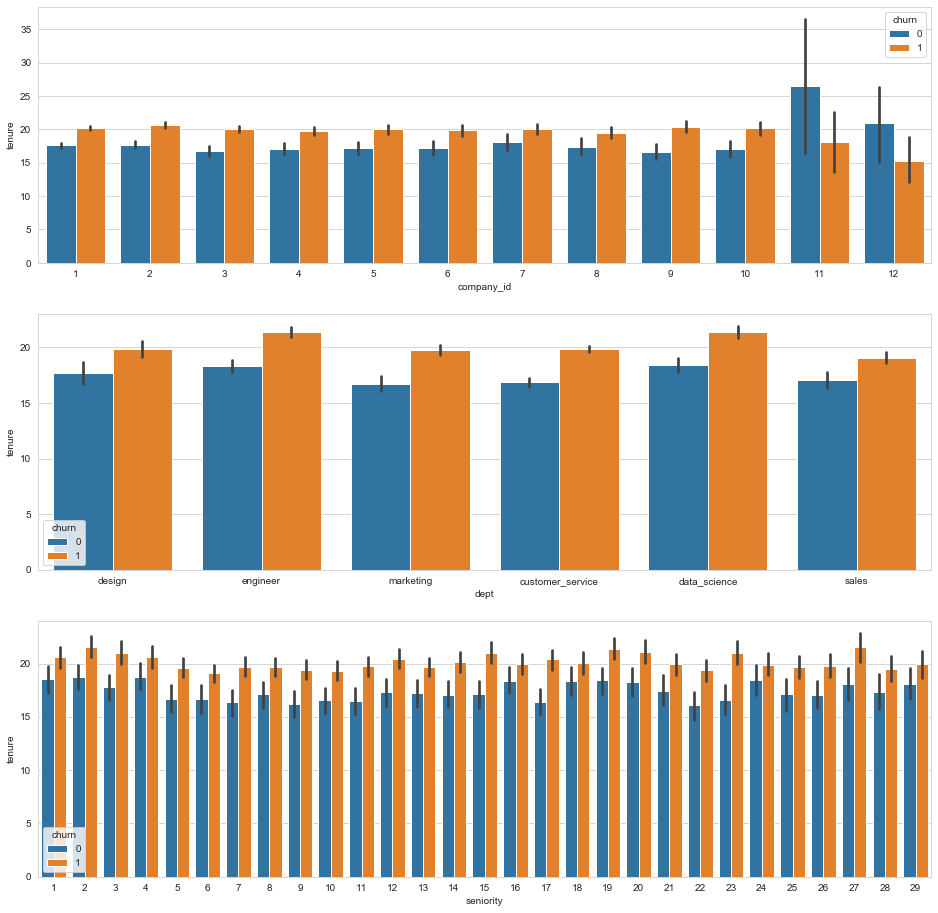

In [19]:
f, axes = plt.subplots(3, 1, figsize=(16,16))
sns.barplot(x='company_id',y='tenure',hue='churn',data=retention, ax=axes[0])
sns.barplot(x='dept',y='tenure',hue='churn',data=retention, ax=axes[1])
sns.barplot(x='seniority',y='tenure',hue='churn',data=retention, ax=axes[2])

# sns.catplot(x='company_id',y='tenure',hue='churn',data=retention,kind="violin",height=8,aspect=2)
# sns.catplot(x='dept',y='tenure',hue='churn',data=retention,kind="violin",height=8,aspect=2)
# sns.catplot(x='seniority',y='tenure',hue='churn',data=retention,kind="violin",height=8,aspect=2)

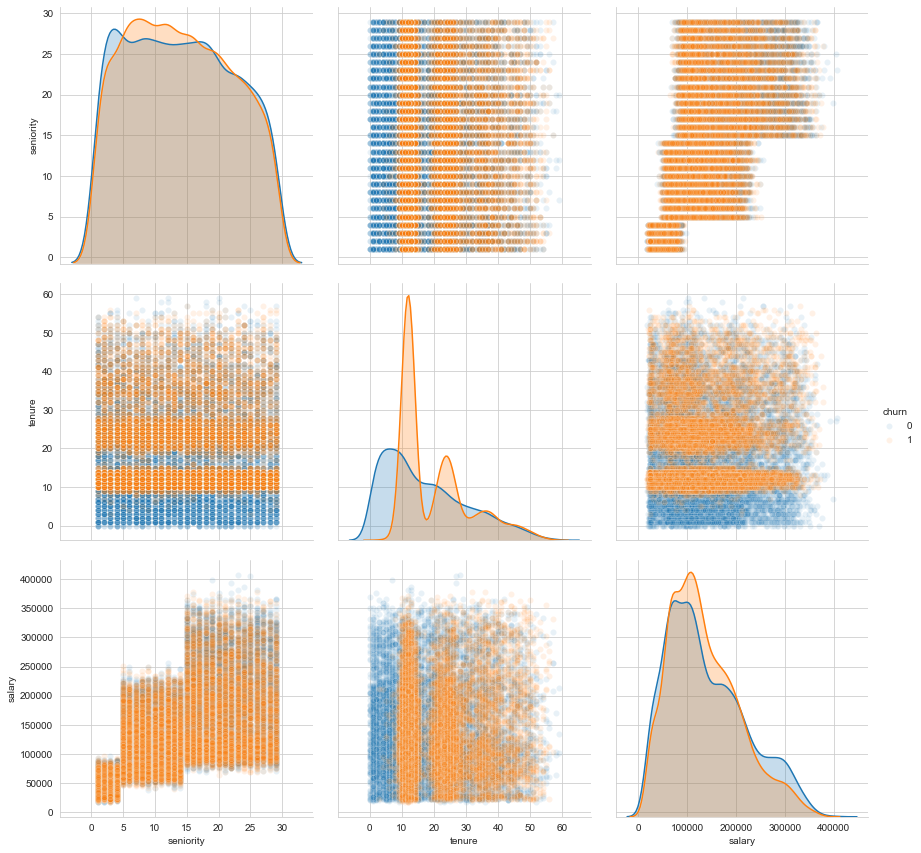

In [20]:
sns.pairplot(retention,height=4,vars=["seniority","tenure","salary"],hue='churn',plot_kws=dict(alpha=0.1))

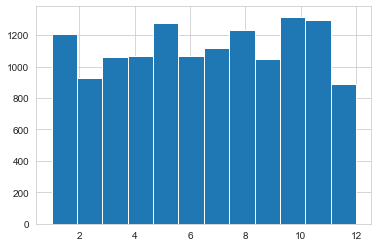

In [21]:
# check "quit" seasonality
# Note: no "seasonality" found
retention['quit_date'].apply(lambda x:x.month if x!=None else None).hist(bins=12)

In [22]:
retention.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn,tenure
1,388804,8,design,21,191000,2011-05-17,2012-03-16,1,10
2,407990,3,design,9,90000,2012-03-26,2015-04-10,1,37
3,120657,2,engineer,20,298000,2013-04-08,2015-01-30,1,21
5,287530,5,marketing,20,180000,2014-06-30,None,0,18
6,561043,3,customer_service,18,119000,2012-07-02,2014-03-28,1,20


In [23]:
# conver "company_id" to string for encoding
retention['company_id'] = retention['company_id'].apply(str)

In [24]:
# preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler

SEED = 101
TEST_SIZE = 0.2

def my_model_evaluation(y_test, predictions):
    print('Confusion Matrix\n\n{}'.format(confusion_matrix(y_test, predictions)))
    print('\n')
    print('Classification Report\n\n{}'.format(classification_report(y_test, predictions)))
    print('\n')
    print('Accuracy Score\n\n{}'.format(accuracy_score(y_test, predictions)))
#     # ROC Graph
#     fpr, tpr, thresholds = roc_curve(y_test, predictions)
#     plt.figure(figsize=(16, 6))
#     plt.plot(fpr, tpr,label='Model')
#     plt.plot([0,1], [0,1],label='Base')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC')
#     plt.legend(loc="lower right")
#     plt.show()

def plot_importance(X,importances):
    indices = np.argsort(importances)[::-1]
    names = [X.columns[i] for i in indices]
    plt.figure(figsize=(15, 7))
    plt.title("Feature Importance")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), names, rotation=90)
    plt.show()

def create_Xy(df,drop_var,target_var,encode_var):
    """
    df: dataframe to be converted
    drop_var: variables to be removed from independent variables list
    target_var: target variable
    encode_var: variables to be encoded
    """
    X = pd.concat([df.drop(drop_var+target_var+encode_var,axis=1),
                   pd.get_dummies(df[encode_var],drop_first=True#, dummy_na = True
                 )], axis=1)
    y = df[target_var].copy()
    return X, y

drop_var = ['employee_id','join_date','quit_date']
target_var = ['churn']
encode_var = ['company_id','dept']
X, y = create_Xy(retention,drop_var,target_var,encode_var)

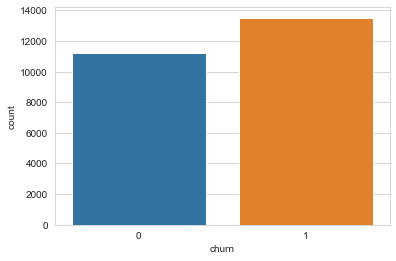

In [25]:
sns.countplot(x='churn',data=retention)

In [26]:
# train/test split
X_train,X_test,y_train,y_test = train_test_split(X.values,
                                                 y.values.ravel(),
                                                 test_size=TEST_SIZE,
                                                 random_state=SEED,
                                                 stratify=y)

# feature scaling
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

             Algorithm  Fit Time  Score Time  Accuracy  Precision  Recall  \
6    Gradient Boosting    101.49        1.44     74.27      75.43   72.97   
5        Random Forest    145.15       18.99     69.58      69.40   68.84   
3                  KNN     41.36      291.65     66.72      66.76   65.50   
4        Decision Tree      6.02        0.53     66.09      65.84   65.89   
2                  SVM   1268.51      305.22     65.20      67.96   62.78   
0  Logistic Regression      4.74        0.48     53.09      53.66   53.65   
1          Gaussian NB      0.77        0.73     50.88      53.93   52.99   

   Roc Auc  
6    81.42  
5    76.04  
3    71.42  
4    66.02  
2    64.43  
0    57.97  
1    57.68  


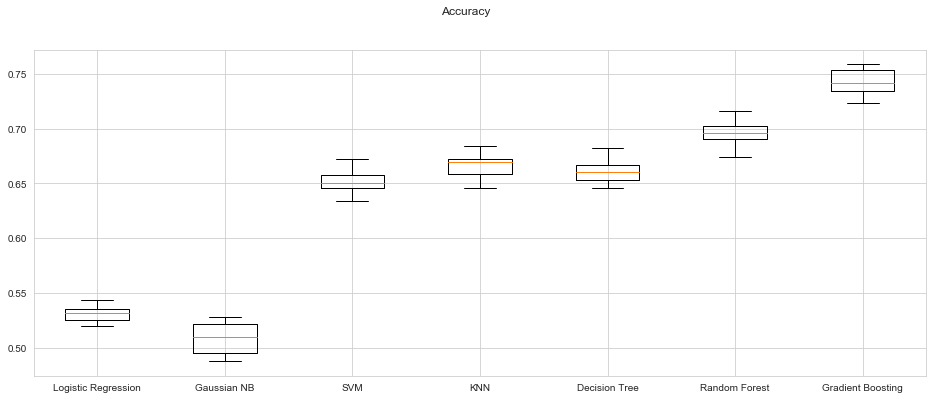

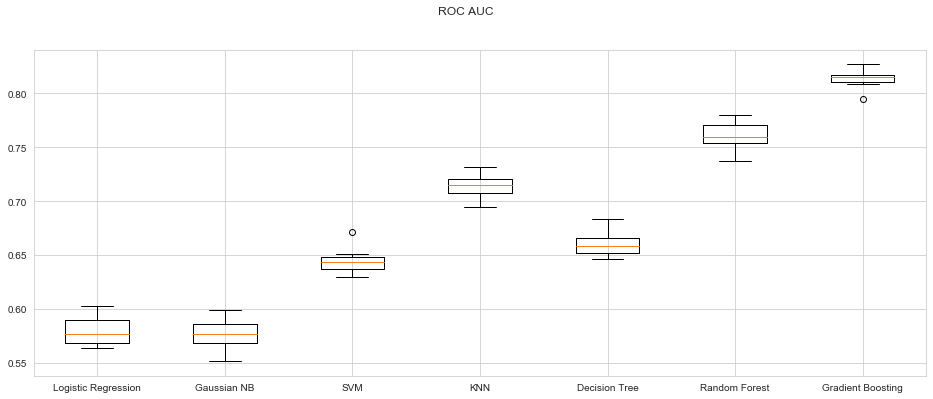

In [27]:
# models
from sklearn import svm, tree, linear_model, neighbors, model_selection
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def my_model_selection(X_train, y_train):
    
    models = []
    models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=SEED,
                                                             class_weight='balanced')))
    models.append(('Gaussian NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto', random_state=SEED)))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('Decision Tree', DecisionTreeClassifier(random_state=SEED)))
    models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=SEED)))
    models.append(('Gradient Boosting', GradientBoostingClassifier()))

    # cross-validation
    names = []
    acc_results = []
    col = ['Algorithm','Fit Time','Score Time','Accuracy','Precision','Recall','Roc Auc']
    df_results = pd.DataFrame(columns=col)
    i = 0

    for name, model in models:   
        kfold = model_selection.KFold(
            n_splits=10, random_state=SEED)  # 10-fold

        scoring = {'acc': 'accuracy',
                   'prec_macro': 'precision_macro',
                   'rec_micro': 'recall_macro',
                   'roc_auc': 'roc_auc'}

        results = model_selection.cross_validate(
            model, X_train, y_train, cv=kfold, scoring=scoring)

        acc_results.append(results)
        names.append(name)
        df_results.loc[i] = [name,
                             round(results['fit_time'].mean()*100, 2),
                             round(results['score_time'].mean()*100, 2),
                             round(results['test_acc'].mean()*100, 2),
                             round(results['test_prec_macro'].mean()*100, 2),
                             round(results['test_rec_micro'].mean()*100, 2),
                             round(results['test_roc_auc'].mean()*100, 2)
                             ]
        i += 1

    print(df_results.sort_values(by=['Accuracy'], ascending=False))

    def box_plot(df, title):
        fig = plt.figure(figsize=(16, 6))
        fig.suptitle(title)
        ax = fig.add_subplot(111)
        plt.boxplot(df)
        ax.set_xticklabels(names)
        plt.show() 

    test_acc = []
    for acc_result in acc_results:
        test_acc.append(acc_result['test_acc'])

    test_roc_auc = []
    for acc_result in acc_results:
        test_roc_auc.append(acc_result['test_roc_auc'])

    box_plot(test_acc, 'Accuracy')    
    box_plot(test_roc_auc, 'ROC AUC')
    
my_model_selection(X_train, y_train)

Confusion Matrix

[[1336  903]
 [ 328 2374]]


Classification Report

              precision    recall  f1-score   support

           0       0.80      0.60      0.68      2239
           1       0.72      0.88      0.79      2702

    accuracy                           0.75      4941
   macro avg       0.76      0.74      0.74      4941
weighted avg       0.76      0.75      0.74      4941



Accuracy Score

0.7508601497672536


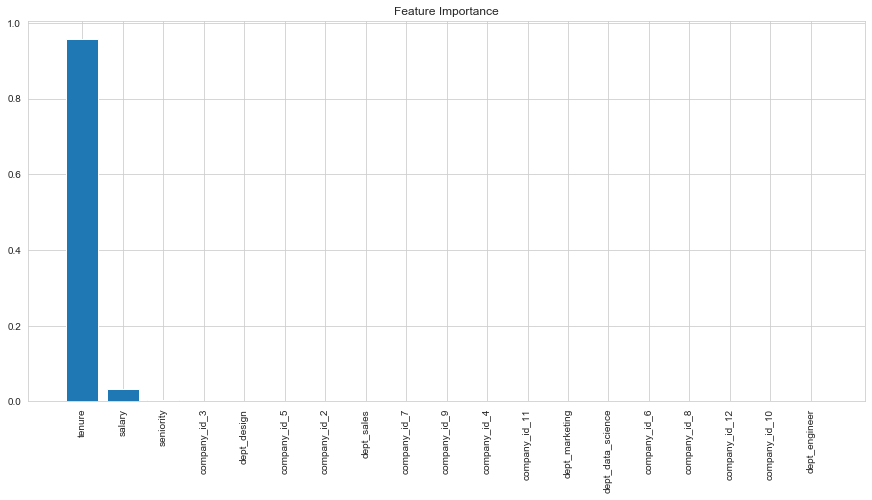

In [28]:
#Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
predictions = gb_classifier.predict(X_test)
my_model_evaluation(y_test, predictions)
plot_importance(X, gb_classifier.feature_importances_)

In [29]:
# # Gradient Boosting Classifier Fine-tuning
# gb_classifier = GradientBoostingClassifier(random_state=SEED)

# param_grid = {'learning_rate':[0.1,0.05,0.01],
#               'n_estimators':range(20,101,20),
#               'max_depth':range(5,16,2),
#               'min_samples_split':range(200,1001,200),
#               'min_samples_leaf':range(30,71,20),
#               'max_features':range(7,20,2),
#               'subsample':0.8
#              }

# grid_obj = GridSearchCV(gb_classifier,
#                         iid=False,
#                         return_train_score=True,
#                         param_grid=param_grid,
#                         scoring='roc_auc',
#                         n_jobs=3,
#                         cv=5)

# grid_fit = grid_obj.fit(X_train, y_train)
# rf_opt = grid_fit.best_estimator_

# # print("best params: " + str(grid_obj.best_estimator_))
# print("best params: " + str(grid_obj.best_params_))
# print('best score:', grid_obj.best_score_)

Confusion Matrix

[[ 447 1792]
 [ 401 2301]]


Classification Report

              precision    recall  f1-score   support

           0       0.53      0.20      0.29      2239
           1       0.56      0.85      0.68      2702

    accuracy                           0.56      4941
   macro avg       0.54      0.53      0.48      4941
weighted avg       0.55      0.56      0.50      4941



Accuracy Score

0.5561627200971463


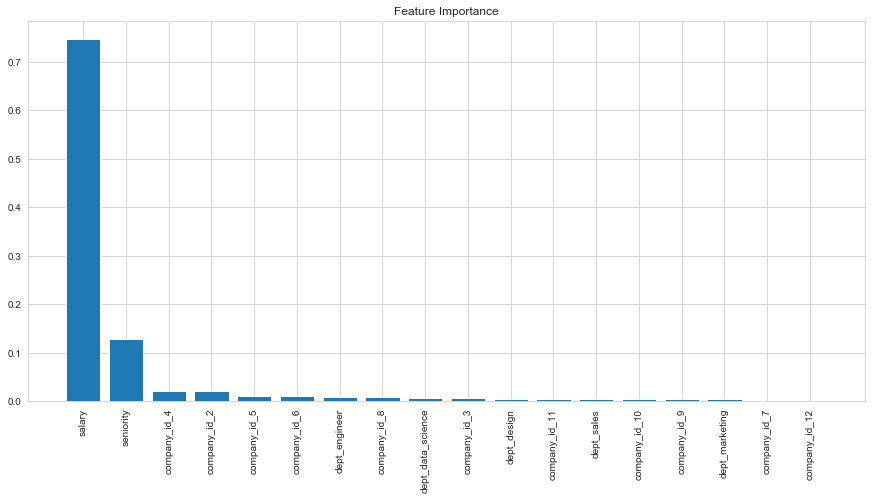

In [31]:
# exclude "tenure" from X
drop_var = ['employee_id','join_date','quit_date','tenure']
target_var = ['churn']
encode_var = ['company_id','dept']
X, y = create_Xy(retention,drop_var,target_var,encode_var)

# train/test split
X_train,X_test,y_train,y_test = train_test_split(X.values,
                                                 y.values.ravel(),
                                                 test_size=TEST_SIZE,
                                                 random_state=SEED,
                                                 stratify=y)

# feature scaling
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# my_model_selection(X_train, y_train)

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
predictions = gb_classifier.predict(X_test)
my_model_evaluation(y_test, predictions)
plot_importance(X, gb_classifier.feature_importances_)

### Retention Plan
* The strongest factor of employee leaving based on this very limited data is: tenure. People tend to leave around 1 or 2 years after start.  
  
Company can consider increase salary or other types of incentives/promotions of qualified employees 1 or 2 years after start to encourage stay.